In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r'C:\Users\suraj\Downloads\hotel_bookings.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015


In [6]:
df.shape

(119390, 32)

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
filter1 = (df['adults']==0) & (df['children']==0) & (df['babies']==0)

In [10]:
filter1

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [11]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [12]:
df[~filter1].shape

(119210, 32)

In [13]:
df2 = df[~filter1]

In [14]:
df2.duplicated().sum()

np.int64(31980)

In [15]:
data = df2.drop_duplicates()

In [16]:
data.shape

(87230, 32)

In [17]:
data[['lead_time','total_of_special_requests','adr']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [19]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [20]:
for col in ['lead_time','total_of_special_requests','adr']:
    print('feature name : {}'.format(col))

    for i in range (90,101,1):
        quantile_value = np.quantile(data[col], q = 1/100)
        print('{}th quantile value is {}'.format (i, quantile_value))

feature name : lead_time
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0
feature name : total_of_special_requests
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0
feature name : adr
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


In [21]:
# WHERE DO THE GUESTS COME FROM

In [22]:
not_cancelled = data[data['is_canceled']==0]

In [23]:
country_wise_data = not_cancelled['country'].value_counts().reset_index()

In [24]:
country_wise_data.columns=['country','no of guests']

In [25]:
country_wise_data

,country,no of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,KIR,1
161,ATF,1
162,TJK,1
163,SLE,1


In [26]:
! pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [29]:
map_guest = px.choropleth(data_frame= country_wise_data,
              locations= country_wise_data['country'],
              color= country_wise_data['no of guests'],
              hover_name= country_wise_data['country'],
              title= 'home country of guests'
              )

In [30]:
map_guest.show()

In [31]:
# IS THERE ANY DIFFERENCE BETWEEN ASSIGNED AND RESERVED ROOM TYPES OR NOT ???

In [32]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [33]:
pivot = pd.crosstab(index=data['reserved_room_type'],columns=data['assigned_room_type'], margins= True, normalize='index').round(2)*100

In [34]:
pivot

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [35]:
# WHICH MARKET SEGMENT HAS HIGHEST BOOKINGS 
# ANALYSING AVG. PRICE PER NIGHT fOR ALL ROOM TYPES

In [36]:
data['market_segment'].value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

In [37]:
data['market_segment'].value_counts().values

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2])

In [38]:
data['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object', name='market_segment')

In [39]:
fig = px.pie(data,values=data['market_segment'].value_counts().values, names= data['market_segment'].value_counts().index)

In [40]:
fig.show()

<Axes: xlabel='market_segment', ylabel='adr'>

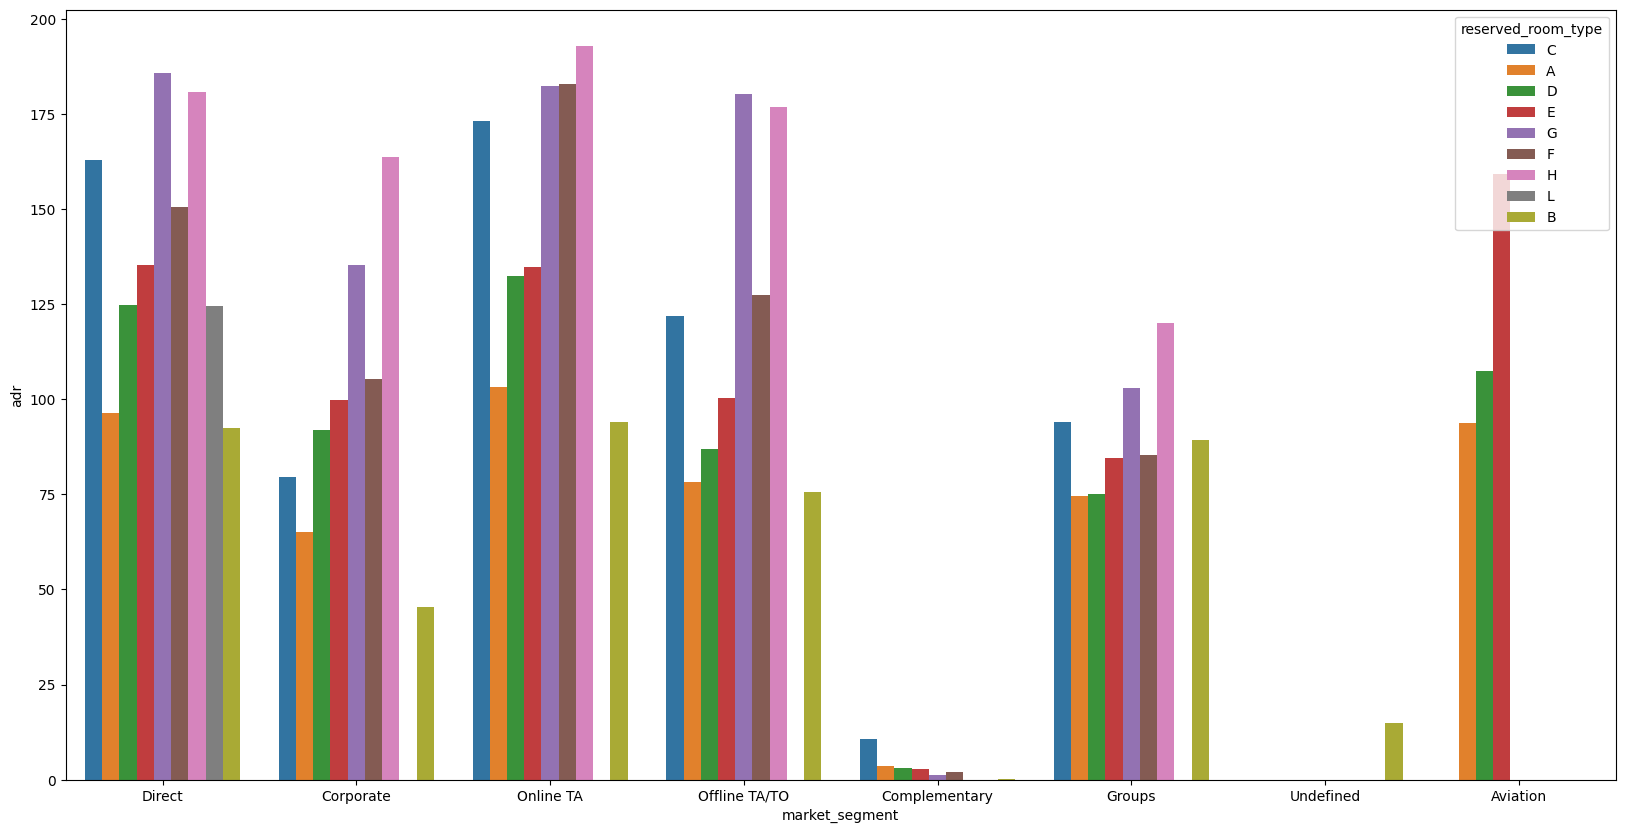

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment',y='adr',data=data, errorbar=None, hue='reserved_room_type')

In [42]:
# TOTAL GUEST ARRIVAL IN A DAY

In [43]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [44]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [45]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
data['arrival_date_month_index'] = data['arrival_date_month'].map(dict_month)

In [47]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index'],
      dtype='object')

In [48]:
data[['arrival_date_year',
      'arrival_date_month_index','arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [50]:
data['arrival_date']=data['arrival_date_year'].astype(str) + "-" + data['arrival_date_month_index'].astype(str) + "-" + data['arrival_date_day_of_month'].astype(str)

In [51]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index', 'arrival_date'],
      dtype='object')

In [52]:
data[['adults', 'children', 'babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [54]:
data['total_guests']=data['adults'] + data['children'] + data['babies']

In [55]:
data[['arrival_date','total_guests']]

,arrival_date,total_guests
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0
...,...,...
119385,2017-8-30,2.0
119386,2017-8-31,3.0
119387,2017-8-31,2.0
119388,2017-8-31,2.0


In [62]:
data_not_cancel = data[data['is_canceled']==0]

In [65]:
guest_arrival_series = data_not_cancel.groupby(['arrival_date'])['total_guests'].sum()

In [66]:
guest_arrival_series

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: total_guests, Length: 793, dtype: float64

<Axes: xlabel='arrival_date'>

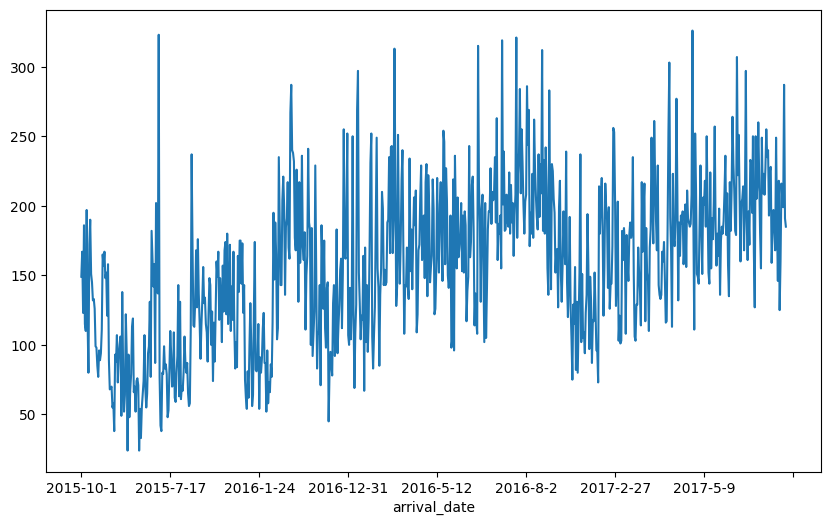

In [68]:
guest_arrival_series.plot(figsize=(10,6))

In [69]:
guest_arrival_series.values

array([149., 167., 123., 186., 115., 110., 197., 118.,  80., 172., 190.,
       151., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
        94., 111., 165., 157., 167., 148., 152., 121., 158.,  89.,  68.,
        69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73.,  92., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  95.,  24.,  93.,  48.,
        68.,  79., 113., 119.,  66.,  70.,  52.,  74.,  76.,  71.,  24.,
        54.,  33.,  55.,  64.,  74., 107.,  68.,  55.,  65.,  94.,  99.,
       131.,  77., 182., 161., 142., 158.,  87., 202., 174., 137., 323.,
        77.,  42.,  38.,  80.,  79.,  99.,  83.,  86.,  79.,  48.,  53.,
        80., 110.,  93.,  70.,  71., 109.,  62.,  59.,  80.,  92., 143.,
        63., 131.,  61.,  70.,  67.,  81., 106.,  87.,  80.,  87.,  65.,
        56.,  58., 111., 237., 171., 114., 113., 131., 168., 127., 176.,
       137., 116.,  90., 114., 132., 156., 130., 134., 115., 109.,  88.,
       122., 148., 143., 100., 124.,  74., 116.,  8

<Axes: ylabel='Density'>

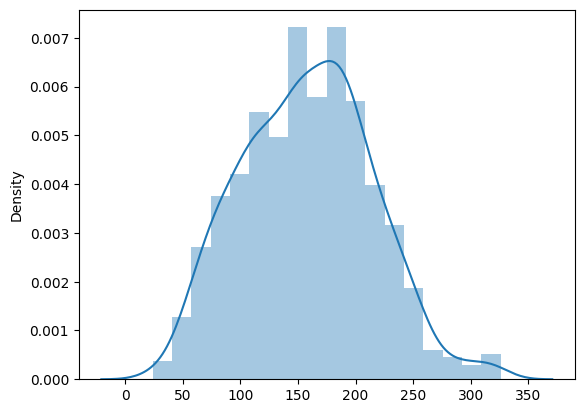

In [71]:
sns.distplot(guest_arrival_series.values)

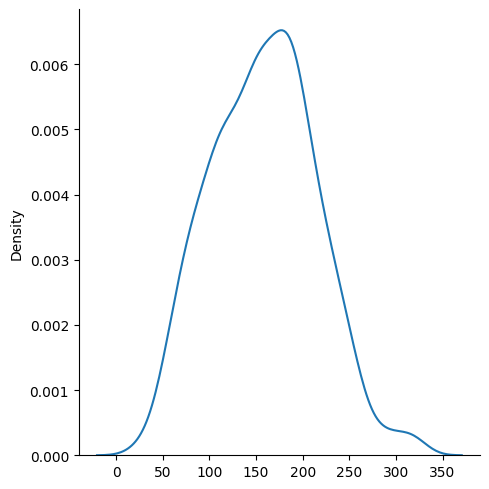

In [73]:
sns.displot(guest_arrival_series.values, kind='kde')

In [76]:
np.mean(guest_arrival_series.values)

np.float64(157.92559899117276)

In [75]:
np.median(guest_arrival_series)

np.float64(158.0)

In [77]:
np.std(guest_arrival_series)

np.float64(56.48263702610786)